In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc = {"figure.figsize":(16, 9)})

In [72]:
h100t100 = np.loadtxt( "build/h100t100.txt")
h200t200 = np.loadtxt( "build/h200t200.txt")
h300t300 = np.loadtxt( "build/h300t300.txt")
h400t400 = np.loadtxt( "build/h400t400.txt")
h500t500 = np.loadtxt( "build/h500t500.txt")

def arr_delta(ht: np.array):
    N = M = len(ht)

    teor_solution = np.zeros((N, M))
    h = 1 / float(N - 1)
    tau = 1 / float(M - 1)

    for i in range(N):
        for j in range(M):
            teor_solution[i][j] =  np.sin(np.pi * j * h) * np.exp(-np.pi * np.pi * i * tau)


    return np.max(ht - teor_solution)

deltas = np.array([arr_delta(h100t100),
                   arr_delta(h200t200),
                   arr_delta(h300t300),
                   arr_delta(h400t400),
                   arr_delta(h500t500)])

hs = np.array([1./100.,1./200.,1./300.,1./400.,1./500.])

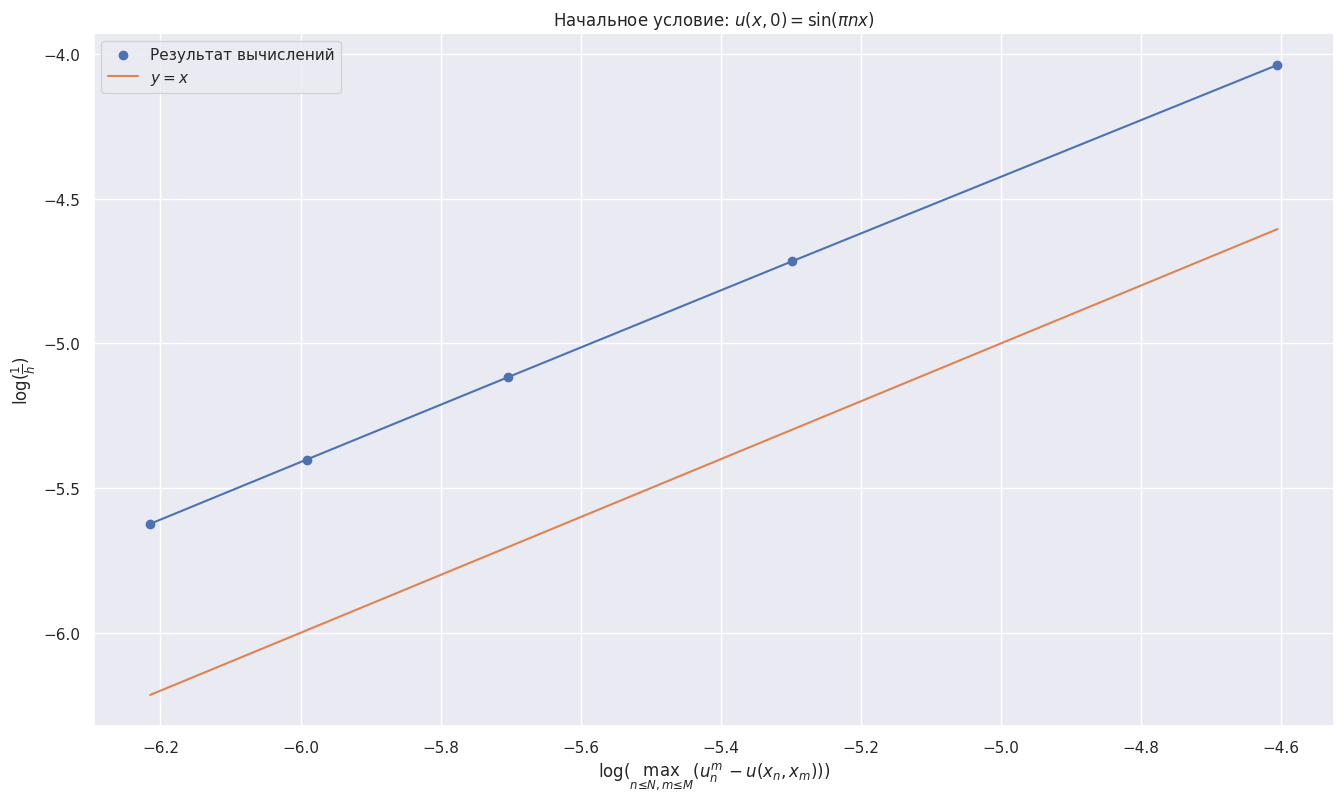

In [79]:
plt.plot(np.log(hs), np.log(deltas))
plt.scatter(np.log(hs), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(hs), np.log(hs), label=r"$y=x$")
plt.title(r"Начальное условие: $u(x,0)=\sin(\pi n x) $")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon.pdf")

In [91]:
h10t100 = np.loadtxt( "build/h10t100.txt")
h20t400 = np.loadtxt( "build/h20t400.txt")
h30t900 = np.loadtxt( "build/h30t900.txt")


def arr_delta(ht: np.array):
    N, M = ht.shape

    teor_solution = np.zeros((N, M))
    h = 1 / float(N - 1)
    tau = 1 / float(M - 1)

    for i in range(N):
        for j in range(M):
            teor_solution[i][j] =  np.sin(np.pi * j * h) * np.exp(-np.pi * np.pi * i * tau)


    return np.max(ht - teor_solution)

deltas = np.array([arr_delta(h10t100),
                   arr_delta(h20t400),
                   arr_delta(h30t900)])

hs = np.array([1./10.,1./20.,1./30.])

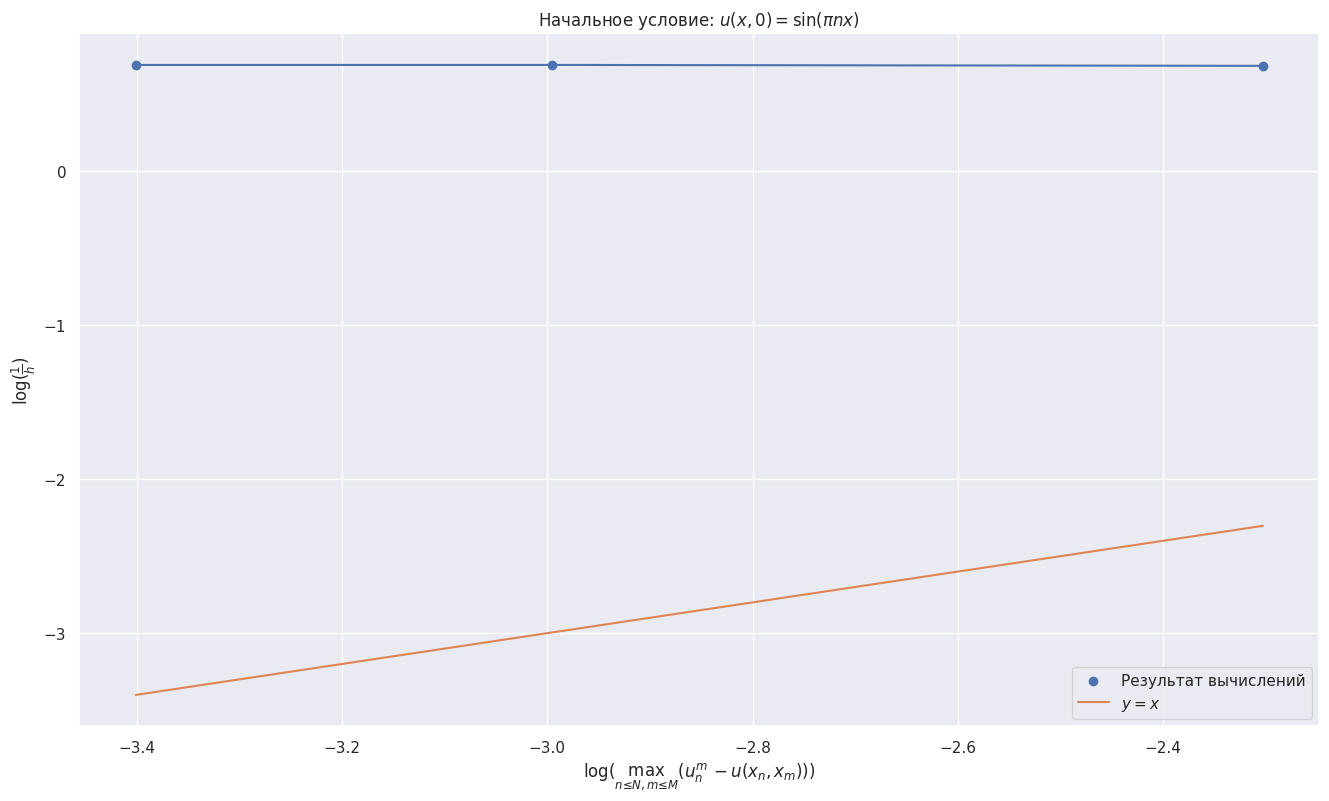

In [92]:
plt.plot(np.log(hs), np.log(deltas))
plt.scatter(np.log(hs), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(hs), np.log(hs), label=r"$y=x$")
plt.title(r"Начальное условие: $u(x,0)=\sin(\pi n x) $")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon.pdf")